In [111]:
import pandas as pd
import Assignment as a
data = pd.read_csv("data.csv")

In [114]:
results = a.AssignmentFunction(np.array((data.exp_years[:1000], data.stopduration[:1000])).T,3,2000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [106]:
import matplotlib.pyplot as plt
def PlotResults(X,r):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = 2
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col, sharex=True, sharey=True)
    
    COLORS = ['r','g','b','m','c','y','k']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        axs[int(i/2),i%2].scatter(X[0], X[1], c=colors)

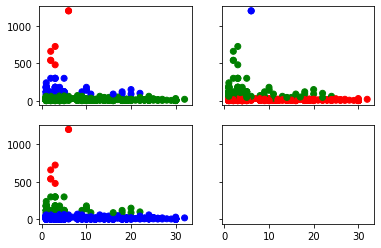

In [116]:
PlotResults(np.array((data.exp_years[:1000], data.stopduration[:1000])),results)